<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Mon Jun 16 07:29:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              3W /   35W |     162MiB /   4096MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device


2.5.1+cu121


### 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
cv_applications = ["Image Recognition", "autonomous vehicles", "Disease classification"]
print("Areas in Industry where computer vision is currently being used are:")
for i,cv_application in enumerate(cv_applications):
    print(f"{i+1}. {cv_application}")


Areas in Industry where computer vision is currently being used are:
1. Image Recognition
2. autonomous vehicles
3. Disease classification


### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [4]:
print(f"Overfitting in machine learning means a model doesn't properly gets trained rather it starts to memorize the data instead of learning patterns. Hence during testing on unseen data it performs horrible. That it what Overfitting mean in machine learning.")

Overfitting in machine learning means a model doesn't properly gets trained rather it starts to memorize the data instead of learning patterns. Hence during testing on unseen data it performs horrible. That it what Overfitting mean in machine learning.


### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [25]:
prev_overft = ["Hyperparameter-tuning", "Cross-validation","Feature selection", "trying out different models","regularization","increase time of training and testing"]

print("Ways to prevent overfitting in machine learning")
for i,prev in enumerate(prev_overft):
    print(f"{i+1}. {prev}")

Ways to prevent overfitting in machine learning
1. Hyperparameter-tuning
2. Cross-validation
3. Feature selection
4. trying out different models
5. regularization
6. increase time of training and testing


### 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [5]:
# ✅✅✅

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
# Import PyTorch

import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# 1. Load the data (your existing code is correct)
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)


In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
# Image and label shapes
x = train_data[0][0]
y = x.permute(2,1,0)
x.shape, y.shape
# train_data[0][1]

(torch.Size([1, 28, 28]), torch.Size([28, 28, 1]))

In [10]:
# Data is in tuple form (image, label)
print(f"Images:\n {train_data[0][0]}")
print(f"Label:\n {train_data[0][1]}")

Images:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [11]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### 6. Visualize at least 5 different samples of the MNIST training dataset.

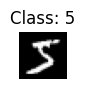

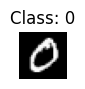

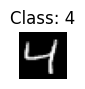

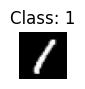

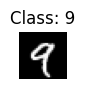

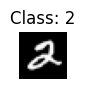

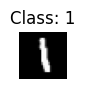

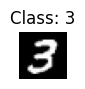

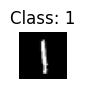

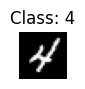

In [12]:
import matplotlib.pyplot as plt
NUM_OF_SUBPLOTS = 10
for i in range(NUM_OF_SUBPLOTS):
    img = train_data[i][0]#0,1,2 (1,28,28),c,h,w
    # img = img.squeeze(dim=0) # or you can also do this. img = img.permute(h,w,c)=>1,2,0
    img = img.permute(1,2,0)
    label = train_data[i][1]

    plt.subplot(1,NUM_OF_SUBPLOTS,i+1)
    plt.imshow(img,cmap=plt.gray())
    plt.title(f"Class: {label}")
    plt.axis(False)
    plt.tight_layout()
    plt.show()

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data.dataloader import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset= train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_dataloader = DataLoader(
    dataset= test_data,
    shuffle=False,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x242bd477df0>,
 <torch.utils.data.dataloader.DataLoader at 0x242bd477ca0>)

### 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

### TinyVGG Architecture for MNISTModelV0

* Layer 1 ` conv2d -> ReLU -> conv2d -> ReLU -> Maxpool2d `

* Layer 2 ` conv2d -> ReLU -> conv2d -> ReLU -> Maxpool2d `

* Layer 3 ` Flatten -> Linear `

In [14]:
class MNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Calculate flattened output size
        self._dummy_input = torch.randn(1, input_shape, 28, 28)
        with torch.no_grad():
            x = self.block_1(self._dummy_input)
            x = self.block_2(x)
            flattened_shape = x.view(1, -1).shape[1]

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_shape, output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [15]:
len(class_names)

10

In [16]:
## Instantiating the model_2
torch.manual_seed(42)
model_2 = MNISTModelV0(
    input_shape=1,
    hidden_units=10,
    output_shape= len(class_names)# 
)
model_2

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

In [18]:
## Setup loss function, accuracy and optimizer
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [19]:
epochs = 5

## Train time on CPU
model_cpu = MNISTModelV0(1,10,10).to("cpu")
# model_gpu = MNISTModelV0(1,10,10).to(device=device)

## Setup loss function, accuracy and optimizer for model_cpu
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(), lr=0.1)


## Train time on GPU
# model_gpu = MNISTModelV0(1,10,10).to(device)

# ## Setup loss function, accuracy and optimizer for model_cpu
# from helper_function import accuracy_fn
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_gpu.parameters(), lr=0.1)

In [20]:
from timeit import default_timer as timer

start_time_cpu = timer()

for epoch in range(epochs):
    model_cpu.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to("cpu"), y.to("cpu")

        # 1. Forward pass
        y_logits = model_cpu(X)

        # 2. Calculate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # 3. Calculate accuracy
        acc = accuracy_fn(y, y_logits.argmax(dim=1))
        train_acc += acc

        # 4. Zero grad
        optimizer.zero_grad()

        # 5. Loss backward
        loss.backward()

        # 6. Optimizer step
        optimizer.step()

    # Evaluation
    model_cpu.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

            test_logits = model_cpu(X_test)
            loss = loss_fn(test_logits, y_test)
            test_loss += loss.item()

            acc = accuracy_fn(y_test, test_logits.argmax(dim=1))
            test_acc += acc

    # Print epoch results
    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss/len(train_dataloader):.4f}, "
          f"Train Acc: {train_acc/len(train_dataloader):.2f}%")
    print(f"Test  Loss: {test_loss/len(test_dataloader):.4f}, "
          f"Test  Acc: {test_acc/len(test_dataloader):.2f}%")

end_time_cpu = timer()
print(f"\nTotal train time on CPU: {end_time_cpu - start_time_cpu:.2f} seconds")



Epoch 1/5
Train Loss: 0.2410, Train Acc: 92.05%
Test  Loss: 0.0708, Test  Acc: 97.71%

Epoch 2/5
Train Loss: 0.0762, Train Acc: 97.64%
Test  Loss: 0.0570, Test  Acc: 98.08%

Epoch 3/5
Train Loss: 0.0605, Train Acc: 98.11%
Test  Loss: 0.0605, Test  Acc: 97.91%

Epoch 4/5
Train Loss: 0.0517, Train Acc: 98.40%
Test  Loss: 0.0458, Test  Acc: 98.46%

Epoch 5/5
Train Loss: 0.0445, Train Acc: 98.61%
Test  Loss: 0.0402, Test  Acc: 98.63%

Total train time on CPU: 371.77 seconds


CPU took 4 minutes 15.2 seconds [255.25 seconds]

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device 

'cuda'

In [22]:
# Train time on GPU
model_gpu = MNISTModelV0(1,10,10).to("cuda")

## Setup loss function, accuracy and optimizer for model_cpu
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(), lr=0.1)

In [23]:
from timeit import default_timer as timer

start_time_gpu = timer()

for epoch in range(epochs):
    model_gpu.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to("cuda"), y.to("cuda")

        # 1. Forward pass
        y_logits = model_gpu(X)

        # 2. Calculate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # 3. Calculate accuracy
        acc = accuracy_fn(y, y_logits.argmax(dim=1))
        train_acc += acc

        # 4. Zero grad
        optimizer.zero_grad()

        # 5. Loss backward
        loss.backward()

        # 6. Optimizer step
        optimizer.step()

    # Evaluation
    model_gpu.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to("cuda"), y_test.to("cuda")

            test_logits = model_gpu(X_test)
            loss = loss_fn(test_logits, y_test)
            test_loss += loss.item()

            acc = accuracy_fn(y_test, test_logits.argmax(dim=1))
            test_acc += acc

    # Print epoch results
    print(f"\nEpoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss/len(train_dataloader):.4f}, "
          f"Train Acc: {train_acc/len(train_dataloader):.2f}%")
    print(f"Test  Loss: {test_loss/len(test_dataloader):.4f}, "
          f"Test  Acc: {test_acc/len(test_dataloader):.2f}%")

end_time_gpu = timer()
print(f"\nTotal train time on GPU: {end_time_gpu - start_time_gpu:.2f} seconds")



Epoch 1/5
Train Loss: 0.3005, Train Acc: 90.00%
Test  Loss: 0.0626, Test  Acc: 97.82%

Epoch 2/5
Train Loss: 0.0664, Train Acc: 97.98%
Test  Loss: 0.0624, Test  Acc: 98.09%

Epoch 3/5
Train Loss: 0.0512, Train Acc: 98.41%
Test  Loss: 0.0434, Test  Acc: 98.45%

Epoch 4/5
Train Loss: 0.0441, Train Acc: 98.62%
Test  Loss: 0.0352, Test  Acc: 98.80%

Epoch 5/5
Train Loss: 0.0389, Train Acc: 98.72%
Test  Loss: 0.0402, Test  Acc: 98.71%

Total train time on GPU: 122.80 seconds


### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

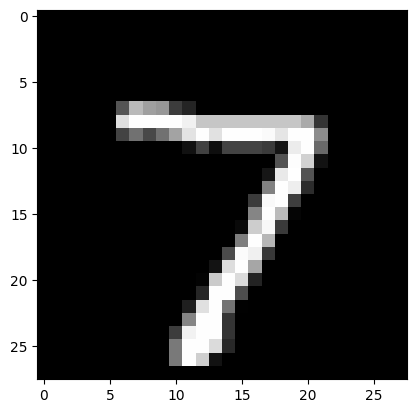

In [24]:
plt.imshow(test_data[0][0].squeeze())

In [25]:
# logits -> prediction probabilities -> prediction labels

model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0)).to(device)
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = model_pred_probs.argmax(dim=1)
model_pred_label

tensor([7], device='cuda:0')

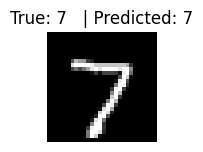

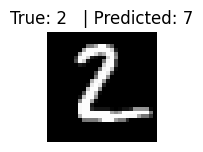

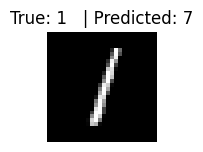

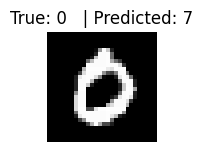

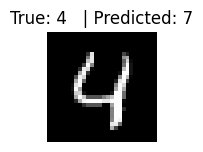

In [26]:
NUM_TO_PLOT = 5

for i in range(NUM_TO_PLOT):
    image = test_data[i][0].squeeze()
    label = test_data[i][1]

    # Make model predictions on image
    model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0)).to(device)
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = model_pred_probs.argmax(dim=1)

    plt.subplot(1,NUM_TO_PLOT,i+1)
    plt.imshow(image)
    plt.title(f"True: {label}   | Predicted: {model_pred_label.cpu().item()}")
    plt.axis(False)
    plt.tight_layout()
    plt.show()

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [27]:
# make predictions across all test data
model_gpu.eval()
y_preds = []
with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
        X,y = X.to(device), y.to(device)
        y_logits = model_gpu(X)
        y_pred_labels = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

        y_preds.append(y_pred_labels)
    y_preds = torch.cat(y_preds)
len(y_preds)

10000

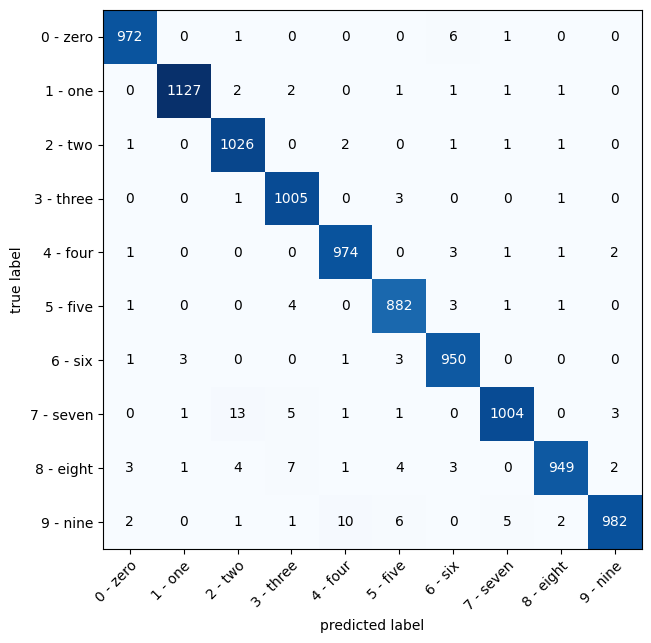

In [32]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

# setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names)).to(device)
confmat_tensor = confmat(preds=y_preds, target=test_data.targets.to(device))

# plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.cpu().numpy(),  # Convert to CPU and numpy array
    class_names=class_names,
    figsize=(10,7)
)

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [34]:
random_tensor = torch.rand([1,3,64,64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [36]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 10, 64, 64])


### 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?